 ### <center> Homework Assignment 7 </center>

Héctor Andrade Loarca # 375708 

Melf Boeckel # 543098

In [1]:
% First we call the Wavelab toolbox
WavePath;

Welcome to WaveLab v 850 
Setting Global Variables

WAVELABPATH =

/Applications/MATLAB_R2014a.app/toolbox/Wavelab850/

[Warning: Function realpow has the same name as a MATLAB builtin. We suggest you
rename the function to avoid a potential name conflict.] 
[> In path at 33
  In WavePath at 132
  In pymat_eval at 31
  In matlabserver at 24] 
Pathnames Successfully Set
global WAVELABPATH = "/Applications/MATLAB_R2014a.app/toolbox/Wavelab850/"
global PATHNAMESEPARATOR = "/"; global MATLABVERSION = 8.3
global PREFERIMAGEGRAPHICS = 1
WaveLab v 802 Setup Complete

Available Demos - Figures from the following papers:
  AdaptDemo  - ``Adapting to Unknown Smoothness via Wavelet Shrinkage''
  AsympDemo  - ``Wavelet Shrinkage: Asymptopia?''
  BlockyDemo - ``Smooth Wavelet Decompositions with Blocky Coefficient Kernels''
  CorrelDemo - ``Wavelet Threshold Estimators for Data with Correlated Noise''
  IdealDemo  - ``Ideal Spatial Adaptation via Wavelet Shrinkage''
  MESDemo    - ``Minimum Ent

Lets construct a filter of compactly supported Daubechies wavelets

In [2]:
h = MakeONFilter('Daubechies',4);

In [3]:
% Lets define the size of the signlas
N=4*64;

Now lest define $e_i$, as the canonical vector of length N with 1 in i

In [4]:
i=2;
e_i=zeros(N,1)';
e_i(i)=1.0;

Lets check how the scaling function and wavelet function looks like

Scaling function:

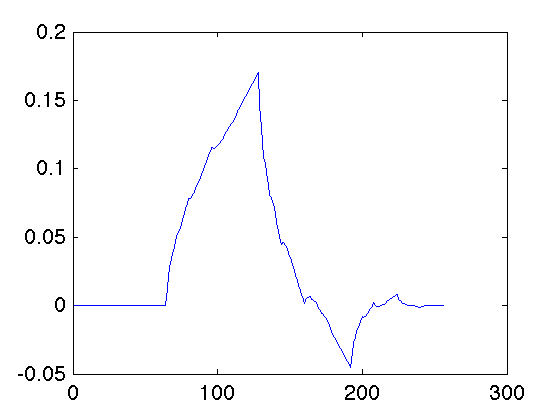

In [5]:
plot(IWT_PO(e_i,2,h));

Wavelet function:

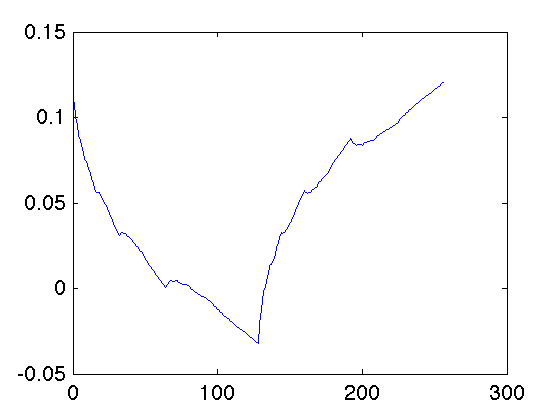

In [6]:
plot(IWT_PO(e_i,1,h));

Lets define a smooth function $f$ and plot its wavelet coefficients.

In [7]:
x = linspace(0,2*pi,N);
f = x.^2;

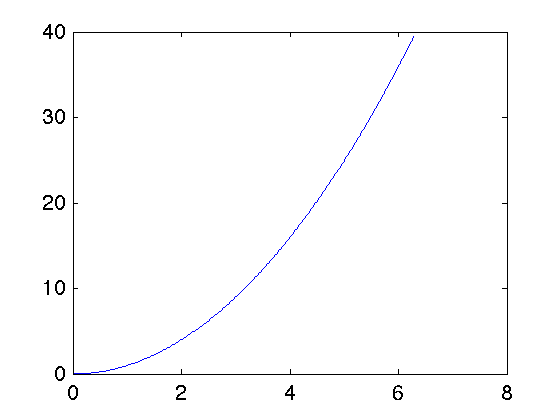

In [8]:
plot(x,f);

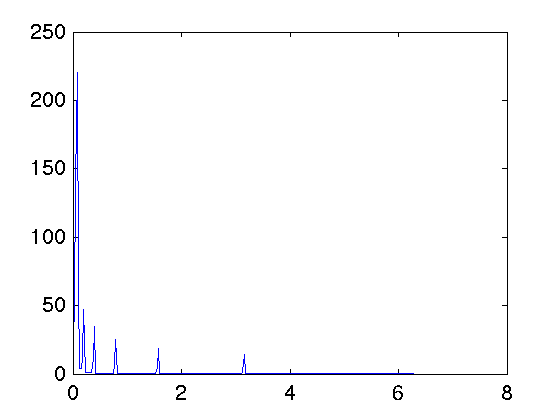

In [40]:
fwtf=FWT_PO(f,2,h);
plot(x,abs(fwtf))

Lets define a smooth function $g$ and plot its wavelet coefficients.

In [10]:
g=zeros(1,N);
for i=1:int64(N/3)
    g(i)=x(i);
end
for i=int64(N/3):int64(2*N/3)
    g(i)=x(int64(N/3))+x(i)^3;
end
for i=int64(2*N/3):N
    g(i)=x(i)^2;
end

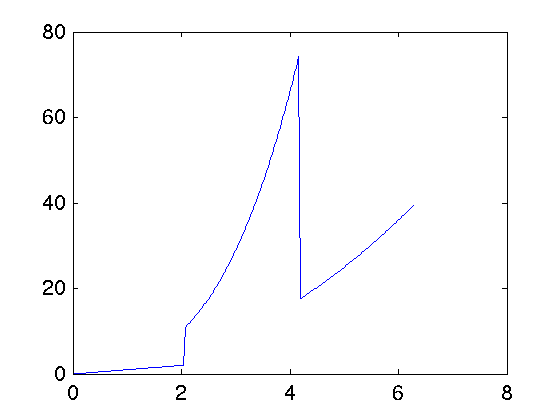

In [11]:
plot(x,g)

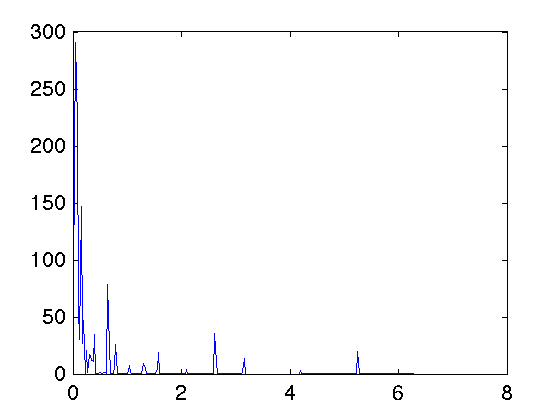

In [30]:
fwtg=FWT_PO(g,2,h);
plot(x,abs(fwtg))

The wavelet coefficients in the smooth function decay rapidly and the wavelet coefficients in the non-smooth function have importan coefficients even for N big (does not recay rapidly), regular functions are more compressible. 

The signal g is piecewise, lets recover the signals, with wavelet coefficients and fourier coefficients, setting to zero the coefficients with value less than 10% of the largest coefficient.

Lets compute first, the fft coefficients 

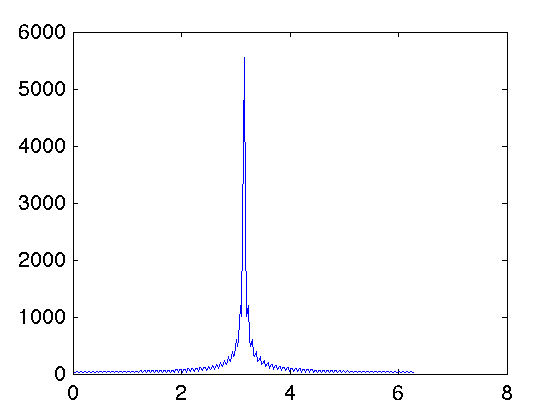

In [31]:
fftg=ifftshift(fft2(fftshift(g)));
plot(x,abs(fftg))

Lets set to zero the values less than the 10% of the maximum value

In [32]:
threshold=max(fftg)*0.01;
for i=1:N
    if fftg(i)<=threshold
        fftg(i)=0;
    end
end

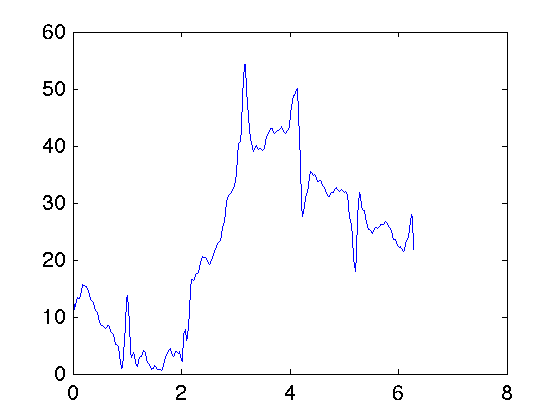

In [33]:
% Recovery of g with fft
plot(x,abs(fftshift(ifft2(ifftshift(fftg)))))

Now with wavelets

In [34]:
threshold=max(fwtg)*0.01;
for i=1:N
    if fwtg(i)<=threshold
        fwtg(i)=0;
    end
end

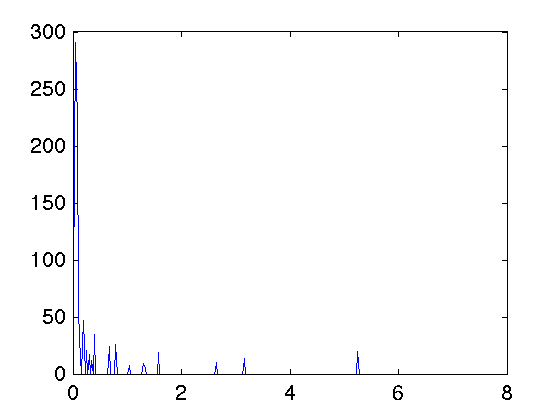

In [35]:
plot(x,fwtg)

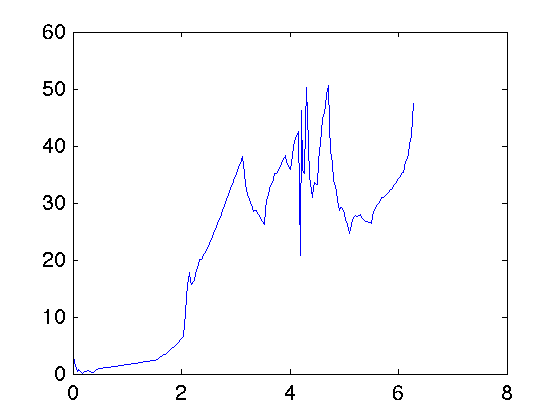

In [41]:
% Recovery of g with wavelets
plot(x,abs(IWT_PO(fwtg,2,h)))

The recovery via wavelets is more accurate